# STAT 207 Project 03 - INSERT TITLE HERE

YOUR NAMES

## 1. Introduction

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pylab as py
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from scipy.stats import logistic
import math

In [101]:
df = pd.read_csv('car_details_v4.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179 cc,138 bhp @ 3750 rpm,330 Nm @ 1600 rpm,FWD,4585.0,1890.0,1785.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814 cc,55 bhp @ 5500 rpm,75 Nm @ 4000 rpm,FWD,3495.0,1550.0,1500.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196 cc,70 bhp @ 6250 rpm,102 Nm @ 4000 rpm,FWD,3795.0,1680.0,1427.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995 cc,188 bhp @ 4000 rpm,400 Nm @ 1750 rpm,RWD,4936.0,1868.0,1479.0,5.0,65.0


In [102]:
missing_values = ["NA", "N/A", "--", "missing", "null", "NaN"]
df = pd.read_csv("car_details_v4.csv", na_values=missing_values)
df = df.dropna(subset=['Engine'])
df = df.dropna(subset=['Length'])
df = df[df.Kilometer < 400000]

In [103]:
df.isna().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain            63
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
dtype: int64

## 2. Linear Regression Analytical Tasks

##### State your research questions: Your research question should have two parts. For example, you might ask “what is the relationship between x1 and y after controlling for x2, x3, and x4 (both in the sample and in the underlying population)? How does my model perform on new data?”

What is the relationship between Fuel tank capacity and mileage after controlling for seating capacity, price, and year (both in the sample and in the underlying population)? How does my model perform on new data? Why this?

##### b. First, split your data into a training and testing set. Be sure that this split is reproducible (can be replicated by another). You may pick what proportion of observations are in the training and what proportion are in the testing sets.

In [104]:
df_train, df_test = train_test_split(df,test_size=0.20, train_size=0.80, random_state=824)

##### ci. Show the summary output for your linear regression.

In [105]:
df_train = df_train.rename(columns={'Seating Capacity': 'SeatingCapacity'})
df_train = df_train.rename(columns={'Fuel Type': 'FuelType'})
df_train['Transmission'] = df_train['Transmission'].map({'Manual': 1, 'Automatic': 0})
results = smf.ols('Kilometer ~ Price + Year + SeatingCapacity + Transmission:FuelType',data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Kilometer   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     124.5
Date:                Mon, 22 Apr 2024   Prob (F-statistic):          1.32e-176
Time:                        18:53:50   Log-Likelihood:                -18147.
No. Observations:                1580   AIC:                         3.631e+04
Df Residuals:                    1570   BIC:                         3.637e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            1.004e+07   3.89e+05     25.809      0.000    9.28e+06    1.08e+07
Price                                  -0.0010      0.000     -3.851      0.000      -0.002      -0.001
Year                                -4969.7133    193.042    -25.744      0.000   -5348.361   -4591.066
SeatingCapacity                      5894.9263    742.787      7.936      0.000    4437.967    7351.885
Transmission:FuelType[CNG]            141.4574   4093.262      0.035      0.972   -7887.379    8170.294
Transmission:FuelType[CNG + CNG]    -6629.3966   2.36e+04     -0.280      0.779    -5.3e+04    3.98e+04
Transmission:FuelType[Diesel]        1.264e+04   1612.997      7.834      0.000    9472.017    1.58e+04
Transmission:FuelType[Hybrid]        1.206e-08   4.67e-10     25.798      0.000    1.11e-08     1.3e-08
Transmission:FuelType[LPG]          -1.923e+04   1.19e+04     -1.616      0.106   -4.26e+04    4108.992
Transmission:FuelType[Petrol]       -7905.8643   1616.189     -4.892      0.000   -1.11e+04   -4735.748
Transmission:FuelType[Petrol + CNG]  1.475e+04   2.36e+04      0.624      0.533   -3.16e+04    6.11e+04
==============================================================================
Omnibus:                      256.506   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              812.904
Skew:                           0.808   Prob(JB):                    3.02e-177
Kurtosis:                       6.121   Cond. No.                     6.13e+24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.06e-34. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

##### cii. Write out the linear regression equation for your model. Use appropriate notation. (Note: if you use a categorical explanatory variable that has a large number of levels, you may pick a specific level and write the model for that specific level. Be sure to clearly state what specific fitted model you are writing.)

$\hat{Y}$ = 10040000 + -0.0010 x price + -4969.7133 x Year + 5894.9263 x Seating Capacity + Fuel Type[Petrol] x -7905.8643

##### di. Interpret your selected slope coefficient (not the intercept) for your linear model (descriptive analytics), describing the relationship between your two variables of interest.

When looking at a vehicle and holding Seating Capacity, Year, Price, all else constant, we assume that a vehicles milegage will decrease by -8363.3990

##### dii. Provide and interpret a 95% confidence interval for the slope coefficient, and in doing so perform inference for the underlying population.

In [120]:
np.quantile(df_train['Kilometer'],0.975)

122000.0

In [121]:
np.quantile(df_train['Kilometer'],0.025)

5959.575

This means that in our training data, we are 95% confident that the mileage of any given car will be between the values of 5959.575 Kilometers, and 122,000 Kilometers.

##### diii. Check all linear regression conditions for your model. Do the conditions support that your answers for the two questions above (descriptive analytics and inference) are valid?

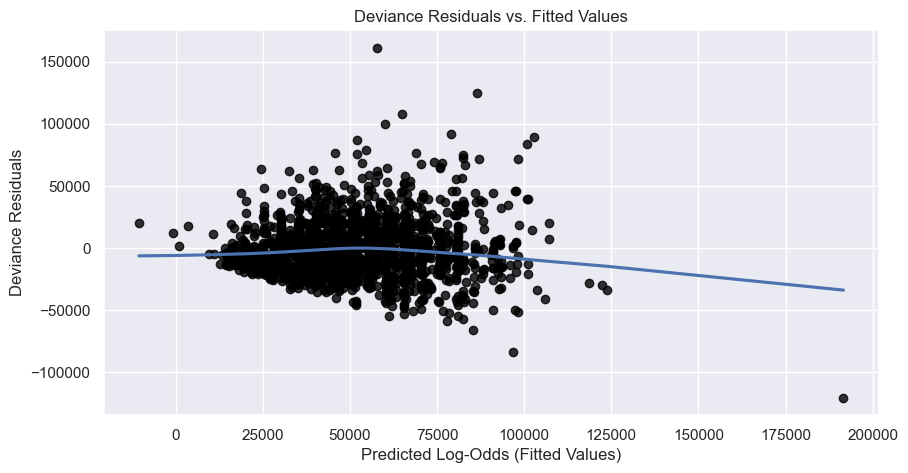

In [122]:
resid = results.resid
plt.figure(figsize=(10, 5))
sns.regplot(x=results.fittedvalues, y=resid,
            color="black",
            line_kws={"color": "b"}, lowess=True)
plt.title("Deviance Residuals vs. Fitted Values")
plt.xlabel("Predicted Log-Odds (Fitted Values)")
plt.ylabel("Deviance Residuals")
plt.show()

In [123]:
predictor_variables = df_train[['Price', 'Year', 'SeatingCapacity']]
correlation_matrix = predictor_variables.corr()
correlation_matrix

,Price,Year,SeatingCapacity
Price,1.000000,0.307173,-0.055838
Year,0.307173,1.000000,0.003776
SeatingCapacity,-0.055838,0.003776,1.000000


Our response variable is quantitative, so this works. I would say that in terms of a linear relationship, all the variables meet this requirement, except the Price variable, and some of the different fuel types. These  don't seem to have an effect on the milegage. In terms of inference, yes our variables our independent, so this fits. Given our low R-squared value, it seems like we can assume a normality of errors. Although it appears that values are not too concentrated, they are for the most part around 0 so I would say that our x and y values have equal variance. When looking at the correlation coefficients, it shows that we don't have multicolinearity which means our model fits this condition.

##### ei. Discuss what percent of variability in your response variable is explained by this model in the training data. Is this high? Is this low?

given that our $R^2$ value is 0.416, it is somewhat low, and can be a concern for our model.  

##### eii. Select one observation in your test data. Make a prediction with your model on this observation, and calculate its residual.

In [110]:
df_test.sample(1, random_state = 300)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
375,Hyundai,i10 Sportz 1.2 Kappa2,275000,2011,42000,Petrol,Manual,Pune,Grey,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0


In [117]:
sampletest = 10040000 + -0.0010 * 275000 + -4969.7133 * 2011 + 5894.9263 * 5 + 1 * -7905.8643
sampletest

67200.32090000005

In [118]:
samp_resid = 42000 - sampletest
samp_resid

-25200.32090000005

##### eiii. Calculate the RMSE on your training data and your testing data. Interpret the RMSE for the testing data. Is this high? Is this low?

In [126]:
mean = results.resid **2
mean1 = mean.mean()
RMSE = math.sqrt(mean1)
RMSE

23542.052725060785

In [114]:
df_test = df_test.rename(columns={'Seating Capacity': 'SeatingCapacity'})
df_test = df_test.rename(columns={'Fuel Type': 'FuelType'})
df_test['Transmission'] = df_test['Transmission'].map({'Manual': 1, 'Automatic': 0})
results2 = smf.ols('Kilometer ~ Price + Year + SeatingCapacity + Transmission:FuelType',data = df_test).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Kilometer   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     43.89
Date:                Mon, 22 Apr 2024   Prob (F-statistic):           1.53e-45
Time:                        18:54:01   Log-Likelihood:                -4591.5
No. Observations:                 396   AIC:                             9199.
Df Residuals:                     388   BIC:                             9231.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                      1.162e+07    9.3e+05     12.497      0.000    9.79e+06    1.34e+07
Price                            -0.0015      0.001     -1.680      0.094      -0.003       0.000
Year                          -5762.0599    461.236    -12.493      0.000   -6668.895   -4855.225
SeatingCapacity                1.068e+04   1845.687      5.787      0.000    7051.778    1.43e+04
Transmission:FuelType[CNG]    -3487.6958   7696.450     -0.453      0.651   -1.86e+04    1.16e+04
Transmission:FuelType[Diesel]  7974.9842   3996.269      1.996      0.047     117.933    1.58e+04
Transmission:FuelType[Hybrid] -3.013e-12   4.82e-13     -6.246      0.000   -3.96e-12   -2.06e-12
Transmission:FuelType[LPG]    -4.937e+04   2.69e+04     -1.837      0.067   -1.02e+05    3472.593
Transmission:FuelType[Petrol] -9783.9317   3698.539     -2.645      0.008   -1.71e+04   -2512.245
==============================================================================
Omnibus:                      165.901   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1063.768
Skew:                           1.653   Prob(JB):                    1.01e-231
Kurtosis:                      10.317   Cond. No.                     6.07e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.63e-33. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [125]:
mean2 = results2.resid **2
mean3 = mean2.mean()
RMSE2 = math.sqrt(mean3)
RMSE2

26260.777879259527

Given that our RMSE is used to quantify the accuracy of the predictions made by the model, it is concerning how high both RMSEs are for the training and testing dataset. 

##### f. Finally, discuss how your approach and conclusions address your research questions.

Our original question was, "What is the relationship between Fuel tank capacity and mileage after controlling for seating capacity, price, and year (both in the sample and in the underlying population)? How does my model perform on new data? Why this?". We used our linear regression model to try and make predictions, and found that it's crucial to consider multiple factors when predicting mileage based on fuel tank capacity. Seating capacity, price, and year are sensible variables to control for, as they can all influence fuel efficiency. Additionally, examining the performance of the model on new data is essential to assess its generalization capability and reliability. The model should be used with precaution, as our low R$^2$ value and high RMSE indicate that our model isn't going to always going to give accurate predictions. 

## 3. Logistic Regression Analytical Tasks

## Any other type of analysis/question you want to explore with this dataset.

<u>Why?</u>: Sometimes undergraduate students will put the research projects that they did for their classes on their resumes when applying for graduate schools, internships, and jobs. If you're interested in showcasing cool analyses to write on your resume, this section could help with that. **(This section is not worth any points though).**

## 4. Conclusion